In [1]:
library(here)

source(here("setup.R"))

here() starts at /Users/stefan/workspace/work/phd/thesis



In [2]:
df_ef <- read_csv(here("data/figures/ef_meis_cem_ssms.csv"))

In [19]:
# count missing values per column on df_ef
df_ef %>%
    select(n, LA=EF_LA,EIS=EF_MEIS, CEM=EF_CEM) %>%
    group_by(n) %>%
    summarise(across(everything(), ~ sum(is.na(.)))) %>%
    kable(format="latex", booktabs=TRUE, linesep="") %>%
    cat(., file=here("tables/ssm_comparison_missing_values.tex"))

Warning message:
“Removed 26 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


pdf 
  2

Warning message:
“Removed 26 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


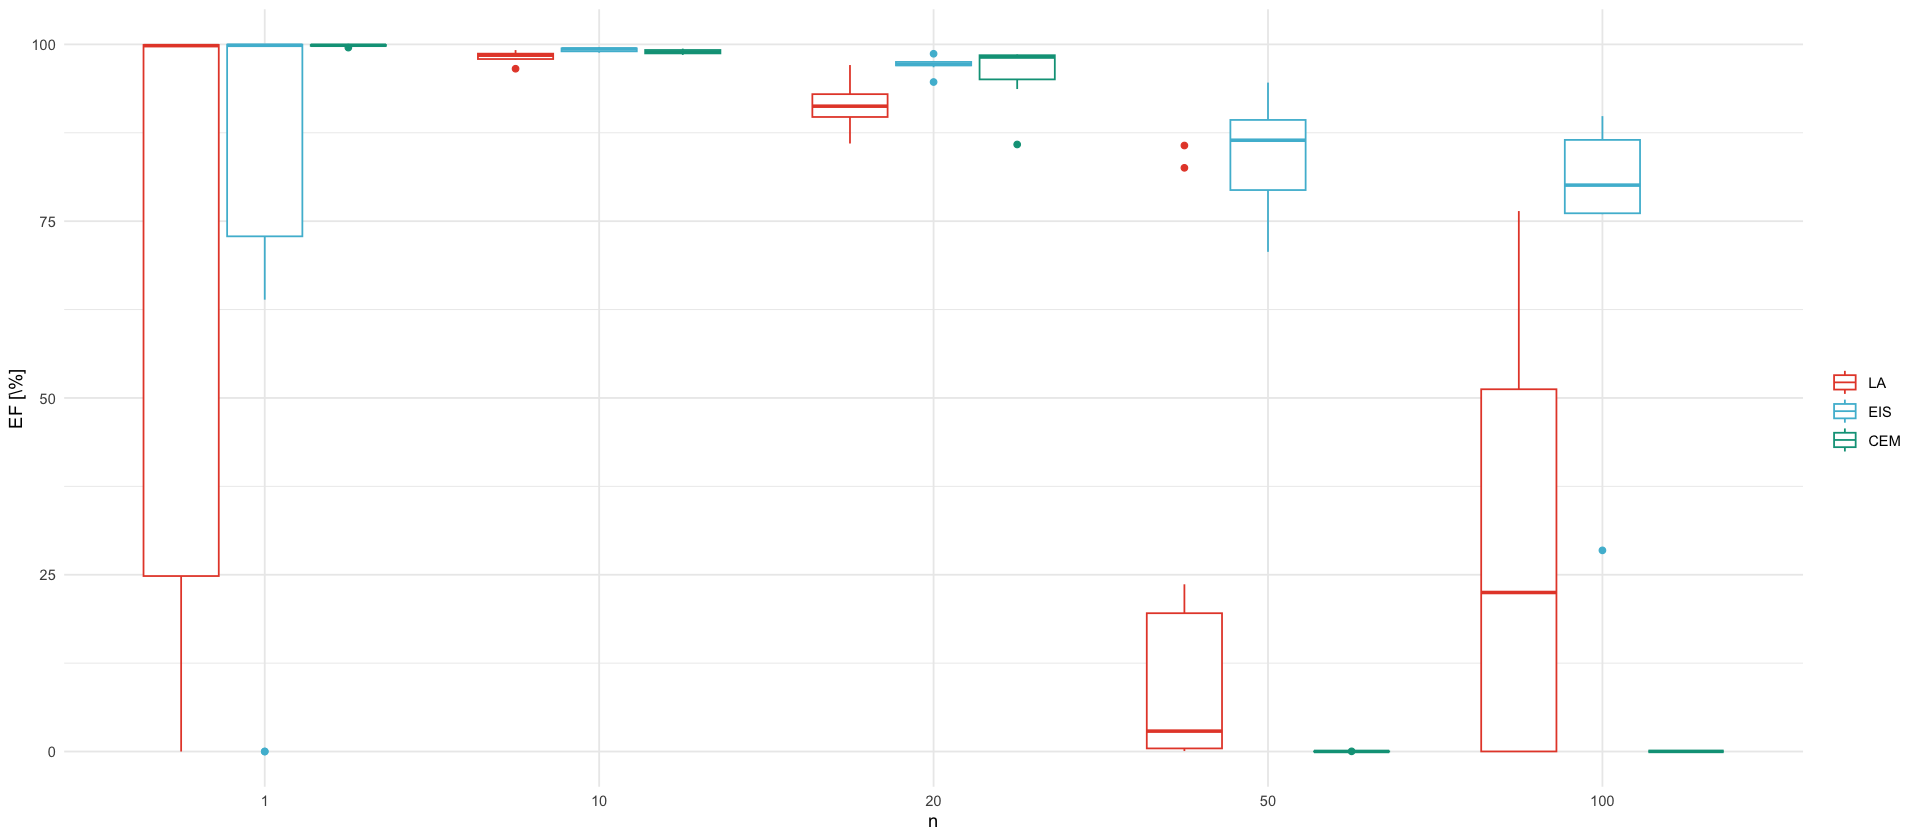

In [3]:
unique_n <- df_ef$n %>% unique() %>% sort()
p_ef <- df_ef %>%
    select(n, LA=EF_LA, CEM=EF_CEM, EIS=EF_MEIS) %>%
    pivot_longer(-n, names_to = "Method", values_to = "EF") %>%
    mutate(Method = factor(Method, levels=c("LA", "EIS", "CEM"))) %>%
    ggplot(aes(x = factor(n), y = EF, color = Method, group=interaction(factor(n), Method))) +
    geom_boxplot() +
    labs(x = "n", y = "EF [\\%]", color="")

ggsave_tikz(
    here("tikz/ssm_comparison_efficiency_factor.tex"),
    plot = p_ef
)
p_ef

In [12]:
df_are

n,N_samples,N_iter,DET_CEM,DET_MEIS,ARE
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10000,1000,1.250198e-21,7.362585e-21,1.698042e-01
1,10000,1000,2.131546e-19,7.124898e-18,2.991686e-02
1,10000,1000,1.520778e-20,6.692526e-20,2.272353e-01
1,10000,1000,6.007386e-17,6.660607e-11,9.019277e-07
1,10000,1000,6.624824e-22,3.177769e-22,2.084741e+00
1,10000,1000,1.151610e-21,3.231204e-21,3.564029e-01
1,10000,1000,3.083249e-23,1.207182e-22,2.554088e-01
1,10000,1000,3.179683e-21,4.044667e-21,7.861420e-01
1,10000,1000,2.180299e-18,8.979118e-15,2.428188e-04


pdf 
  2

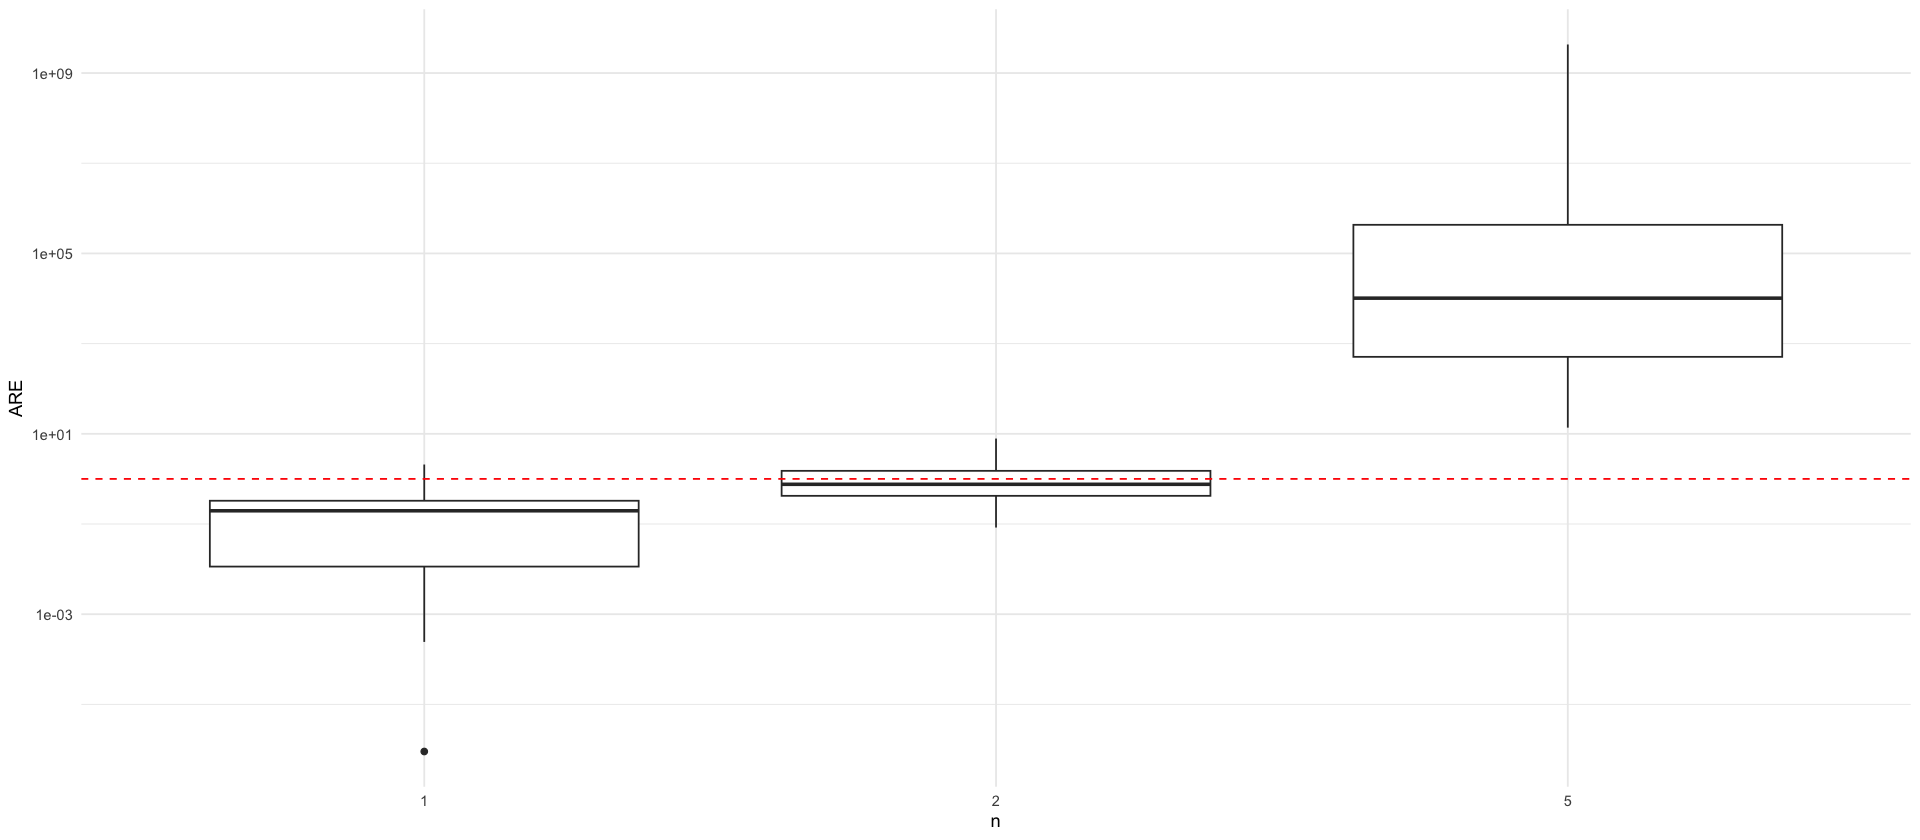

In [15]:
df_are <- read_csv(here("data/figures/are_meis_cem_ssms.csv"))
p_are <- df_are %>%
    filter(n <= 5) %>%
    ggplot(aes(x = factor(n), y = ARE)) +
    geom_boxplot() +
    labs(x = "n", y = "ARE", color="") +
    geom_hline(yintercept = 1, linetype="dashed", color = "red") +
    scale_y_log10() 

ggsave_tikz(
    here("tikz/ssm_comparison_asymptotic_variance.tex"),
    plot = p_are
)
p_are